# IMPORT Libaries


dataset : https://drive.google.com/file/d/1a8biR_KgRKoAXkq4Wn6zP-fj5aXGjsQn/view

In [363]:
import pandas as pd

# Import Data

In [364]:
data = pd.read_csv('/content/sport_data.csv')

# Basic Data Analysis

In [365]:
data

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball
5,18,5,Male,Basketball
6,15,3,Male,Hockey
7,13,3,Male,Hockey
8,13,4,Male,Hockey
9,13,3,Female,Soccer


In [366]:
data.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [367]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,Female,Basketball
14,19,6,Female,Basketball
15,13,3,Female,Hockey
16,14,4,Female,Hockey
17,14,3,Female,Hockey


In [368]:
data.shape

(18, 4)

In [369]:
data.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


# Pre-Process Data

In [370]:
data['Sex'].replace(['Female','Male'], [0,1] , inplace=True)

In [371]:
data.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


In [372]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,0,Basketball
14,19,6,0,Basketball
15,13,3,0,Hockey
16,14,4,0,Hockey
17,14,3,0,Hockey


# Import Machine Learning Libaries

In [373]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [374]:
X = data.drop(columns='Sport')

In [375]:
X.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [376]:
y = data.drop(columns=['Age', 'Height', 'Sex'])

In [377]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build Machine Learning Model

In [379]:
clf = DecisionTreeClassifier()

In [380]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Test ML Model

In [381]:
test = clf.predict(X_test)

In [382]:
test

array(['Soccer', 'Hockey', 'Soccer', 'Basketball', 'Basketball', 'Soccer'],
      dtype=object)

In [383]:
y_test 

,Sport
1,Soccer
6,Hockey
7,Hockey
14,Basketball
5,Basketball
15,Hockey


#Check for Efficacy

In [384]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [385]:
accuracy = accuracy_score(y_test, test)

In [386]:
accuracy

0.6666666666666666

In [388]:
new_student = clf.predict([[15 , 4, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [389]:
new_student

array(['Hockey'], dtype=object)

#Save Model

In [396]:
import joblib

In [397]:
joblib.dump(clf, 'ml_sport_model.joblib')

['ml_sport_model.joblib']

In [400]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [399]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[2, 0, 0],
       [0, 1, 2],
       [0, 0, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


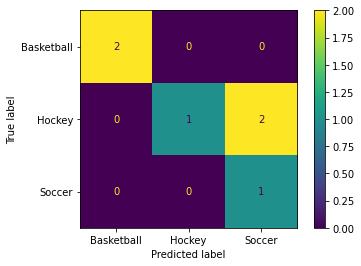

In [401]:
plot_confusion_matrix(clf, X_test, y_test)

In [402]:
y_test

,Sport
1,Soccer
6,Hockey
7,Hockey
14,Basketball
5,Basketball
15,Hockey


In [404]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         2
      Hockey       1.00      0.33      0.50         3
      Soccer       0.33      1.00      0.50         1

    accuracy                           0.67         6
   macro avg       0.78      0.78      0.67         6
weighted avg       0.89      0.67      0.67         6

